<a href="https://colab.research.google.com/github/sanjeekan/fruit_detection-classification/blob/main/fruit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import keras
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
def create_cnn_model(input_shape = (224, 224, 3), num_classes = 5):
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = input_shape))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))

  return model

model = create_cnn_model(input_shape = (224, 224, 3), num_classes = 5)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,940,485 (49.36 MB)

 Trainable params: 12,939,781 (49.36 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
model.compile( loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

valid_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Fruits Classification/train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/Fruits Classification/valid',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

history = model.fit(
    train_generator,
    validation_data = valid_generator,
    epochs = 16,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    validation_steps = valid_generator.samples // valid_generator.batch_size

)

Found 9700 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Epoch 1/16
303/303 ━━━━━━━━━━━━━━━━━━━━ 6616s 21s/step - accuracy: 0.3941 - loss: 1.6935 - val_accuracy: 0.2917 - val_loss: 1.7279
Epoch 2/16
303/303 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.4688 - loss: 1.5373 - val_accuracy: 0.3750 - val_loss: 1.3382
Epoch 3/16
303/303 ━━━━━━━━━━━━━━━━━━━━ 165s 528ms/step - accuracy: 0.4540 - loss: 1.3829 - val_accuracy: 0.4167 - val_loss: 1.3436
Epoch 4/16
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 69us/step - accuracy: 0.4375 - loss: 1.1932 - val_accuracy: 0.3750 - val_loss: 1.4523
Epoch 5/16
303/303 ━━━━━━━━━━━━━━━━━━━━ 202s 529ms/step - accuracy: 0.5197 - loss: 1.1751 - val_accuracy: 0.5000 - val_loss: 1.1242
Epoch 6/16
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 128us/step - accuracy: 0.5625 - loss: 0.9747 - val_accuracy: 0.5000 - val_loss: 0.9910
Epoch 7/16
303/303 ━━━━━━━━━━━━━━━━━━━━ 203s 533ms/step - accuracy: 0.5701 - loss: 1.0538 - val_accuracy: 0.4635 - val_loss: 1.3544
Ep

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1. / 255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Fruits Classification/test',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Found 100 images belonging to 5 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 9s/step - accuracy: 0.6107 - loss: 0.8958
Test Accuracy: 61.00%


In [ ]:
lr_scheduler = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, min_lr = 1e-6)
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
history = model.fit(
    train_generator,
    validation_data = valid_generator,
    epochs = 16,
    callbacks = [lr_scheduler, early_stopping]
)

Epoch 1/16
304/304 ━━━━━━━━━━━━━━━━━━━━ 164s 529ms/step - accuracy: 0.6531 - loss: 0.9056 - val_accuracy: 0.6450 - val_loss: 0.8641 - learning_rate: 0.0010
Epoch 2/16
304/304 ━━━━━━━━━━━━━━━━━━━━ 165s 529ms/step - accuracy: 0.6675 - loss: 0.8605 - val_accuracy: 0.6700 - val_loss: 1.0218 - learning_rate: 0.0010
Epoch 3/16
304/304 ━━━━━━━━━━━━━━━━━━━━ 202s 531ms/step - accuracy: 0.6708 - loss: 0.8579 - val_accuracy: 0.6600 - val_loss: 0.9919 - learning_rate: 0.0010
Epoch 4/16
304/304 ━━━━━━━━━━━━━━━━━━━━ 164s 531ms/step - accuracy: 0.6763 - loss: 0.8514 - val_accuracy: 0.6200 - val_loss: 1.1006 - learning_rate: 0.0010
Epoch 5/16
304/304 ━━━━━━━━━━━━━━━━━━━━ 203s 532ms/step - accuracy: 0.7038 - loss: 0.7796 - val_accuracy: 0.7100 - val_loss: 0.7270 - learning_rate: 2.0000e-04
Epoch 6/16
304/304 ━━━━━━━━━━━━━━━━━━━━ 166s 534ms/step - accuracy: 0.7157 - loss: 0.7614 - val_accuracy: 0.7000 - val_loss: 0.7127 - learning_rate: 2.0000e-04
Epoch 7/16
304/304 ━━━━━━━━━━━━━━━━━━━━ 200s 530ms/step 

In [ ]:
model.save('fruit_detection_model.h5')

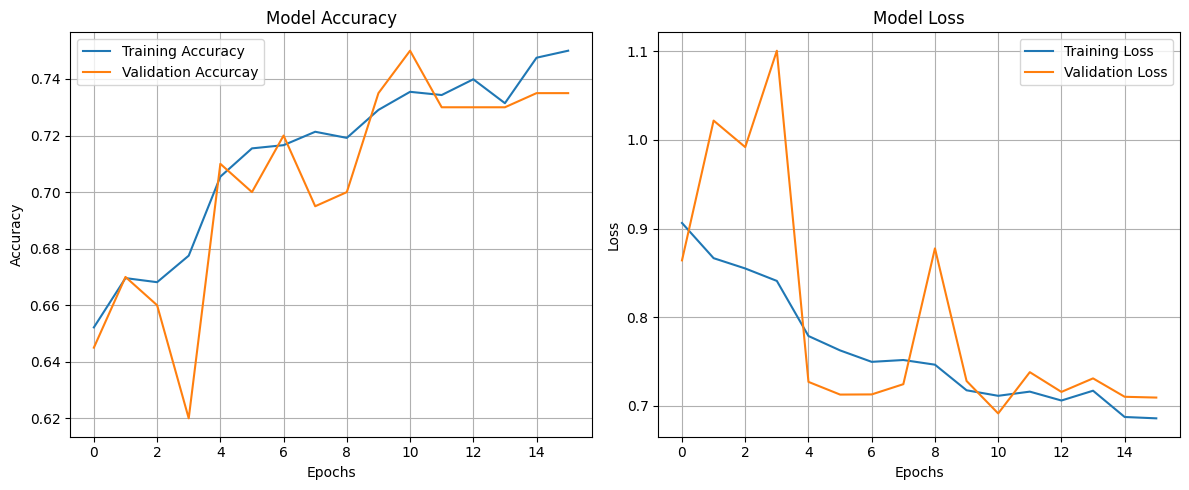

In [ ]:
def plot_metrics(history):
  plt.figure(figsize = (12, 5))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label = 'Training Accuracy')
  plt.plot(history.history['val_accuracy'], label = 'Validation Accurcay')
  plt.title('Model Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label = 'Training Loss')
  plt.plot(history.history['val_loss'], label = 'Validation Loss')
  plt.title('Model Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()

plot_metrics(history)
